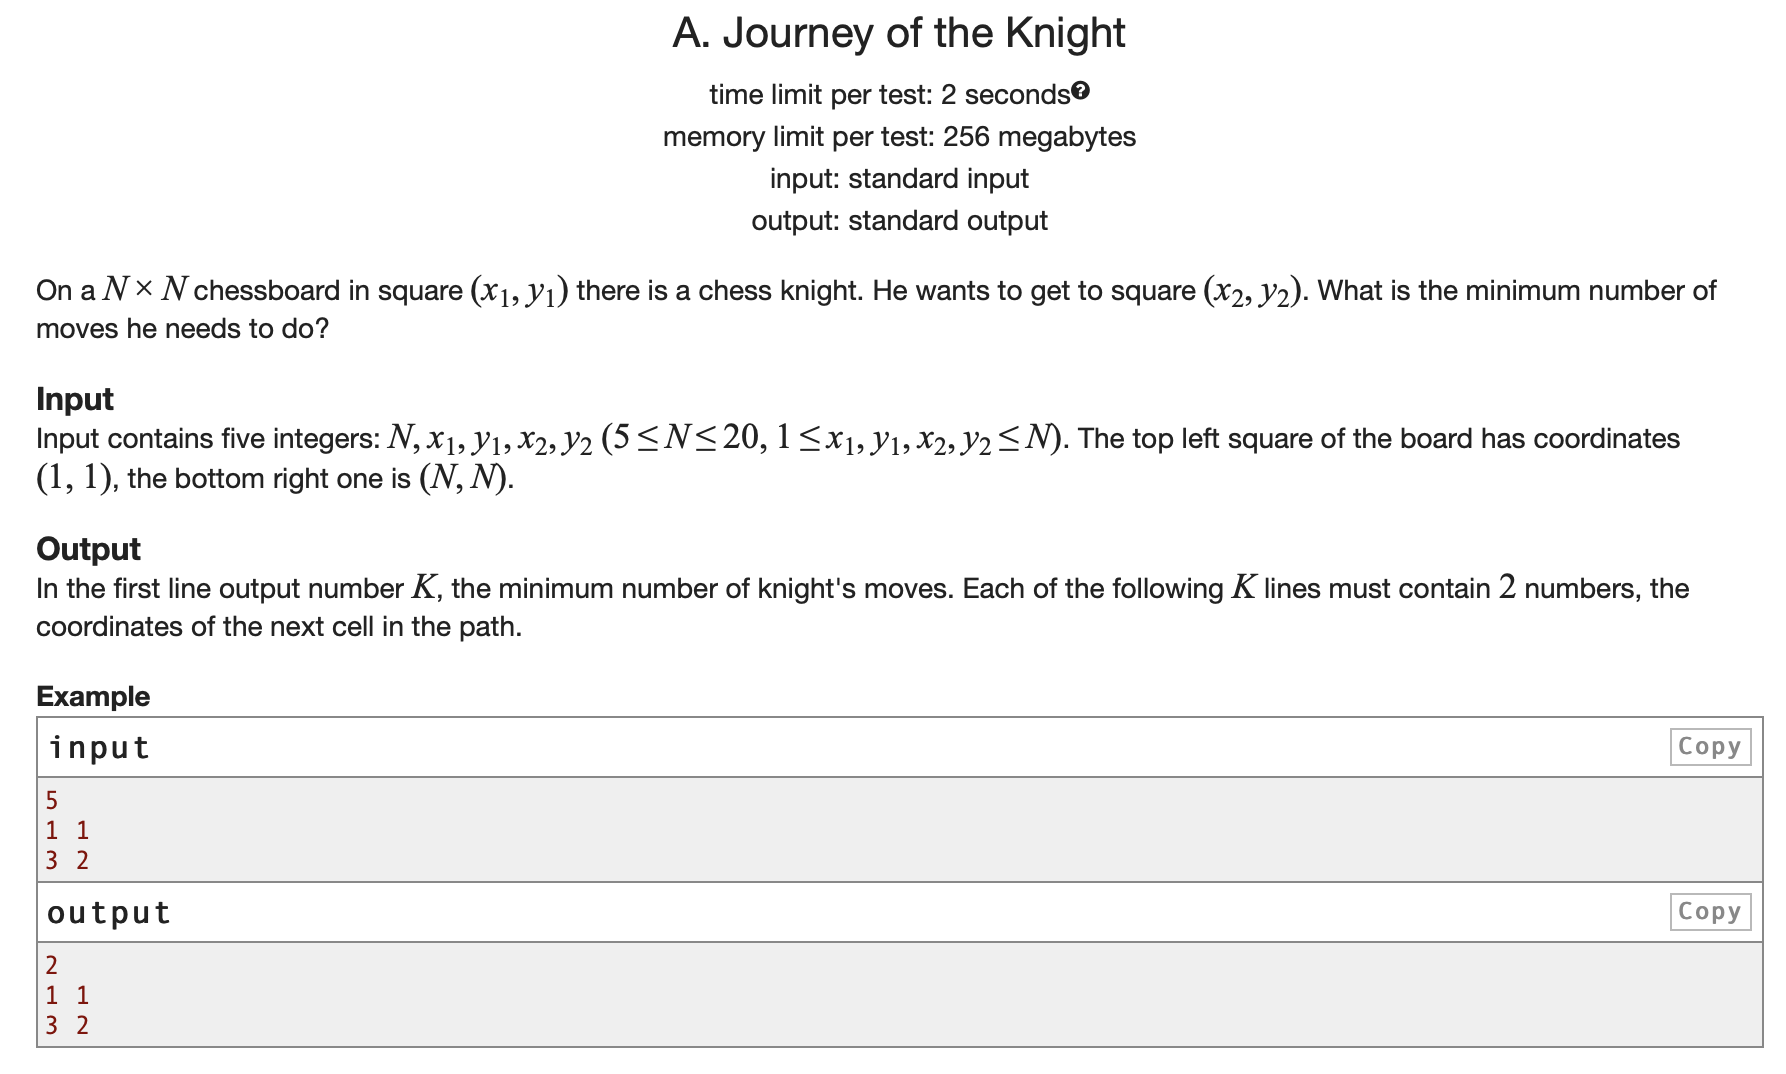

In [80]:
from queue import Queue


def is_possible_move(cell, cells_num):
    if (cell[0] < cells_num and cell[1] < cells_num and
           cell[0] >= 0 and cell[1] >= 0):
        return True
    return False


def bfs(deltas, start_cell, finish_cell, cells_num):
    used = [[False] * cells_num for _ in range(cells_num)]
    parents = [[None] * cells_num for _ in range(cells_num)]
    queue = Queue()
    queue.put(start_cell)
    used[start_cell[0]][start_cell[1]] = True
    while not queue.empty():
        cell = queue.get()
        for delta in deltas:
            next_cell = (cell[0] + delta[0], cell[1] + delta[1])
            if is_possible_move(next_cell, cells_num):
                if not used[next_cell[0]][next_cell[1]]:
                    parents[next_cell[0]][next_cell[1]] = cell
                    if next_cell == finish_cell:
                        return parents
                    used[next_cell[0]][next_cell[1]] = True
                    queue.put(next_cell)
    return None


def get_path(parents, start_cell, finish_cell):
    if not parents:
        return [start_cell]

    path = []
    prev_cell = finish_cell
    while prev_cell != start_cell:
        path.append(prev_cell)
        prev_cell = parents[prev_cell[0]][prev_cell[1]]
    path.append(start_cell)
    return path[::-1]


def find_knight_path(cells_num, start_cell, finish_cell):
    DELTAS = ((-2, -1), (-2, 1), (2, -1), (2, 1), (-1, -2), (-1, 2), (1, -2), (1, 2))
    parents = bfs(DELTAS, start_cell, finish_cell, cells_num)
    path = get_path(parents, start_cell, finish_cell)
    print(len(path))
    for cell in path:
        print(cell[0] + 1, cell[1] + 1)


cells_num = int(input())
start_cell = tuple(map(lambda x: int(x) - 1, input().split()))
finish_cell = tuple(map(lambda x: int(x) - 1, input().split()))
find_knight_path(cells_num, start_cell, finish_cell)

5
1 1
1 2
4
1 1
3 2
2 4
1 2


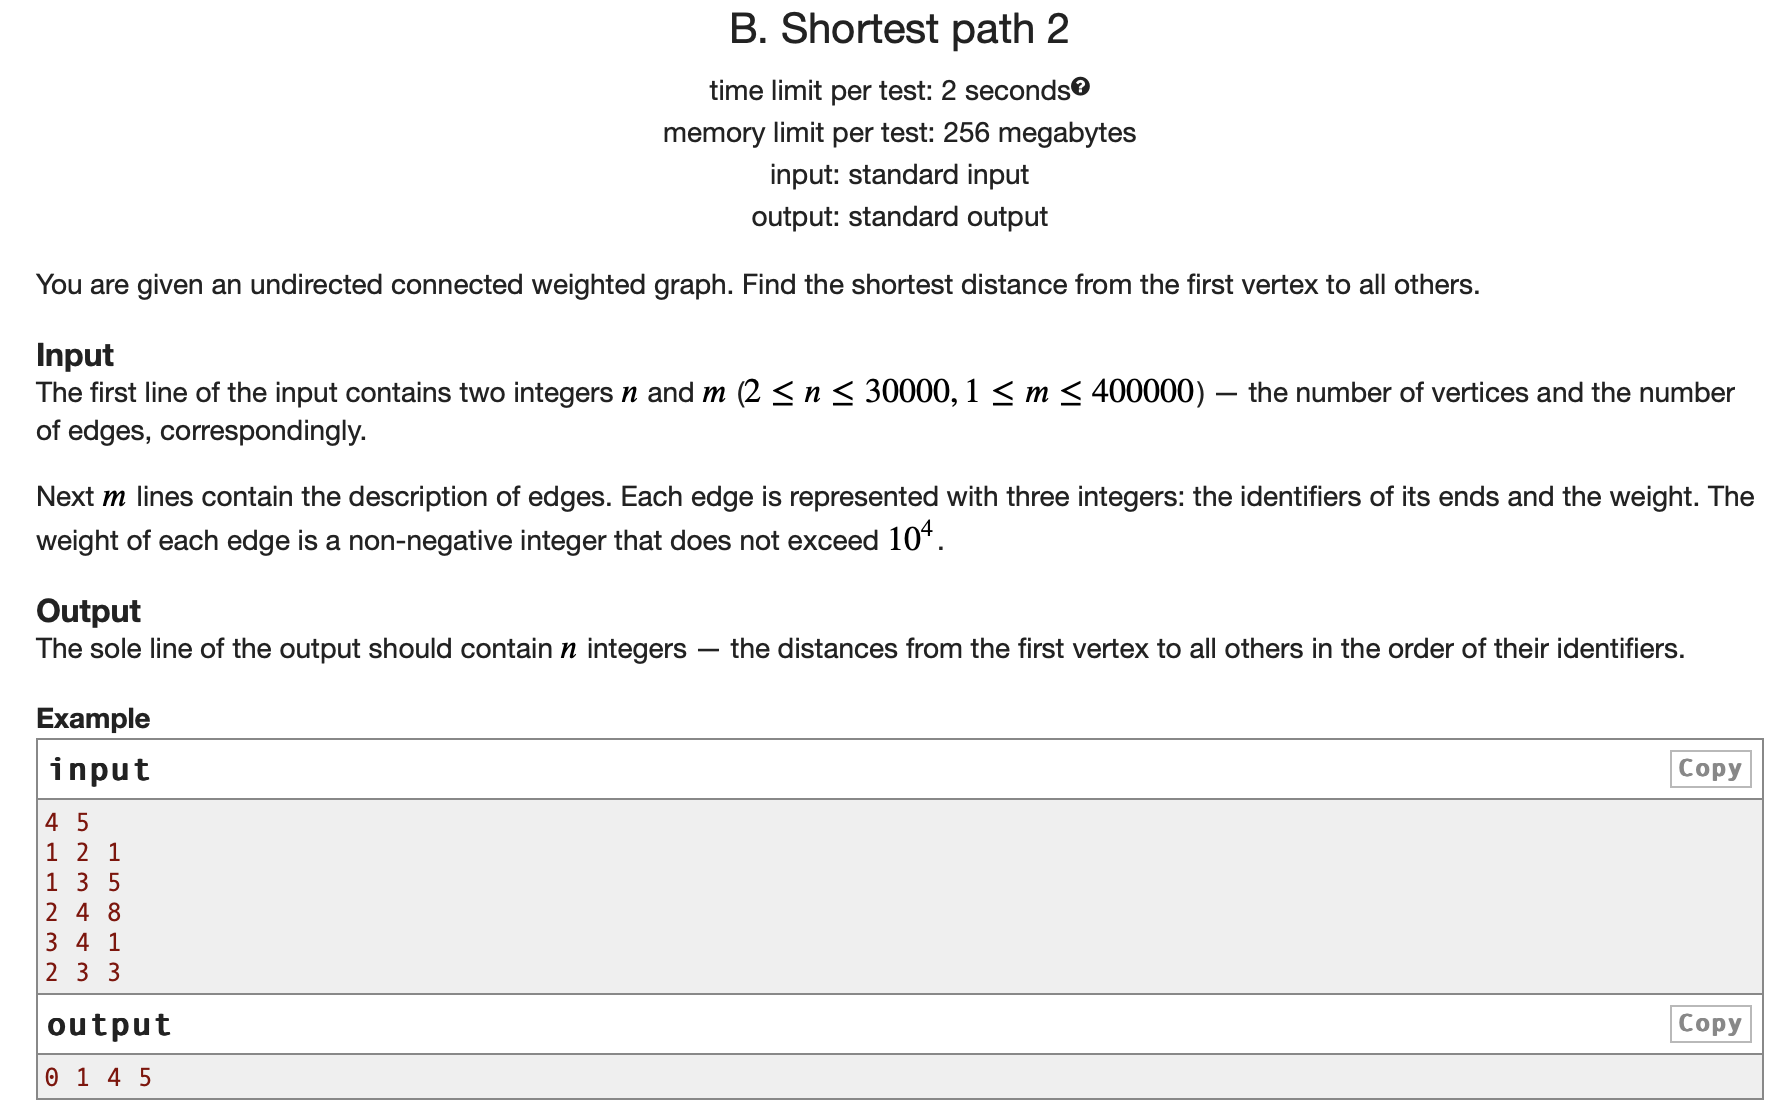

In [111]:
import heapq


def init_adjacency_list(V_num, E_num):
    adjacency_list = [[] for _ in range(V_num)]
    for _ in range(E_num):
        V_1, V_2, weight = list(map(int, input().split()))
        V_1 -= 1
        V_2 -= 1
        adjacency_list[V_1].append((weight, V_2))
        adjacency_list[V_2].append((weight, V_1))
    return adjacency_list


def get_distances(adjacency_list):
    distances = [float("inf")] * len(adjacency_list)
    distances[0] = 0
    used = [False] * len(adjacency_list)
    queue = [(0, 0)]
    while len(queue) > 0:
        vertex = heapq.heappop(queue)[1]
        used[vertex] = True
        for adjacent_vertex_weight, adjacent_vertex in adjacency_list[vertex]:
            if not used[adjacent_vertex]:
                new_distance = distances[vertex] + adjacent_vertex_weight
                if new_distance < distances[adjacent_vertex]:
                    distances[adjacent_vertex] = new_distance
                    heapq.heappush(queue, (new_distance, adjacent_vertex))
    return distances


V_num, E_num = list(map(int, input().split()))
adjacency_list = init_adjacency_list(V_num, E_num)
print(*get_distances(adjacency_list))

3 2
1 3 5
1 2 10
0 10 5


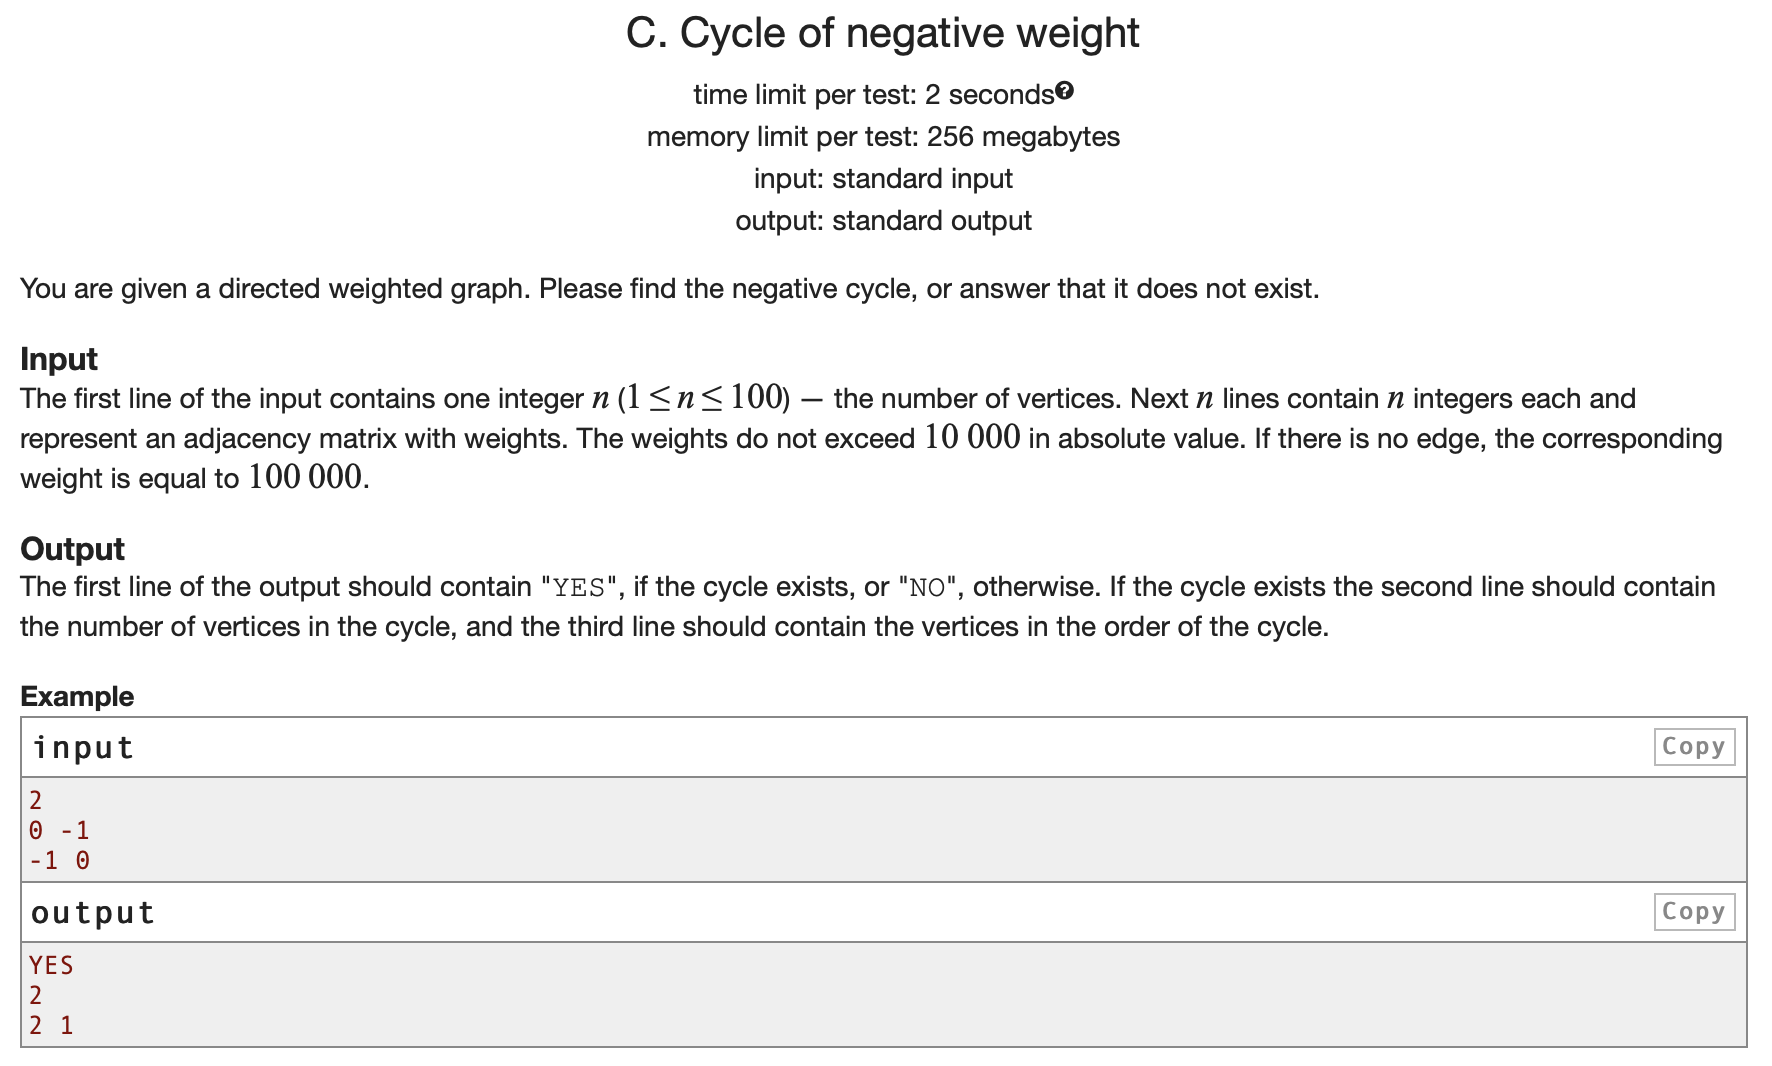

In [162]:
NO_PATH = 100000


def init_graph(V_num):
    weights = [[None] * V_num for _ in range(V_num)]
    for i in range(V_num):
        weights_vertex = list(map(lambda x: int(x) if int(x) != NO_PATH else float("inf"), input().split()))
        weights[i] = weights_vertex
    return weights


def init_next_vertex(V_num):
    next_vertex = [[v for v in range(V_num)] for _ in range(V_num)]
    return next_vertex


def get_distances(graph):
    V_num = len(graph)
    distances = graph
    next_vertex = init_next_vertex(V_num)
    for k in range(V_num):
        for u in range(V_num):
            for v in range(V_num):
                new_distance = distances[u][k] + distances[k][v]
                if distances[u][v] > new_distance:
                    distances[u][v] = new_distance
                    next_vertex[u][v] = next_vertex[u][k]
    return distances, next_vertex


def get_negative_vertex(distances):
    for i in range(len(distances)):
        if distances[i][i] < 0:
            return i
    return None


def get_cycle(vertex, next_vertex):
    path = dict()
    insertion_order = 0
    path[vertex + 1] = insertion_order
    cur = next_vertex[vertex][vertex]
    while cur != vertex:
        insertion_order += 1
        if cur + 1 in path:
            return list(path.keys())[path[cur + 1]:]
        path[cur + 1] = insertion_order
        cur = next_vertex[cur][vertex]
    return path


V_num = int(input())
graph = init_graph(V_num)
distances, next_vertex = get_distances(graph)
negative_vertex = get_negative_vertex(distances)
if negative_vertex is not None:
    cycle = get_cycle(negative_vertex, next_vertex)
    print('YES')
    print(len(cycle))
    print(*cycle)
else:
    print('NO')

3
0 0 0
0 -2 0
0 0 0
YES
1
2


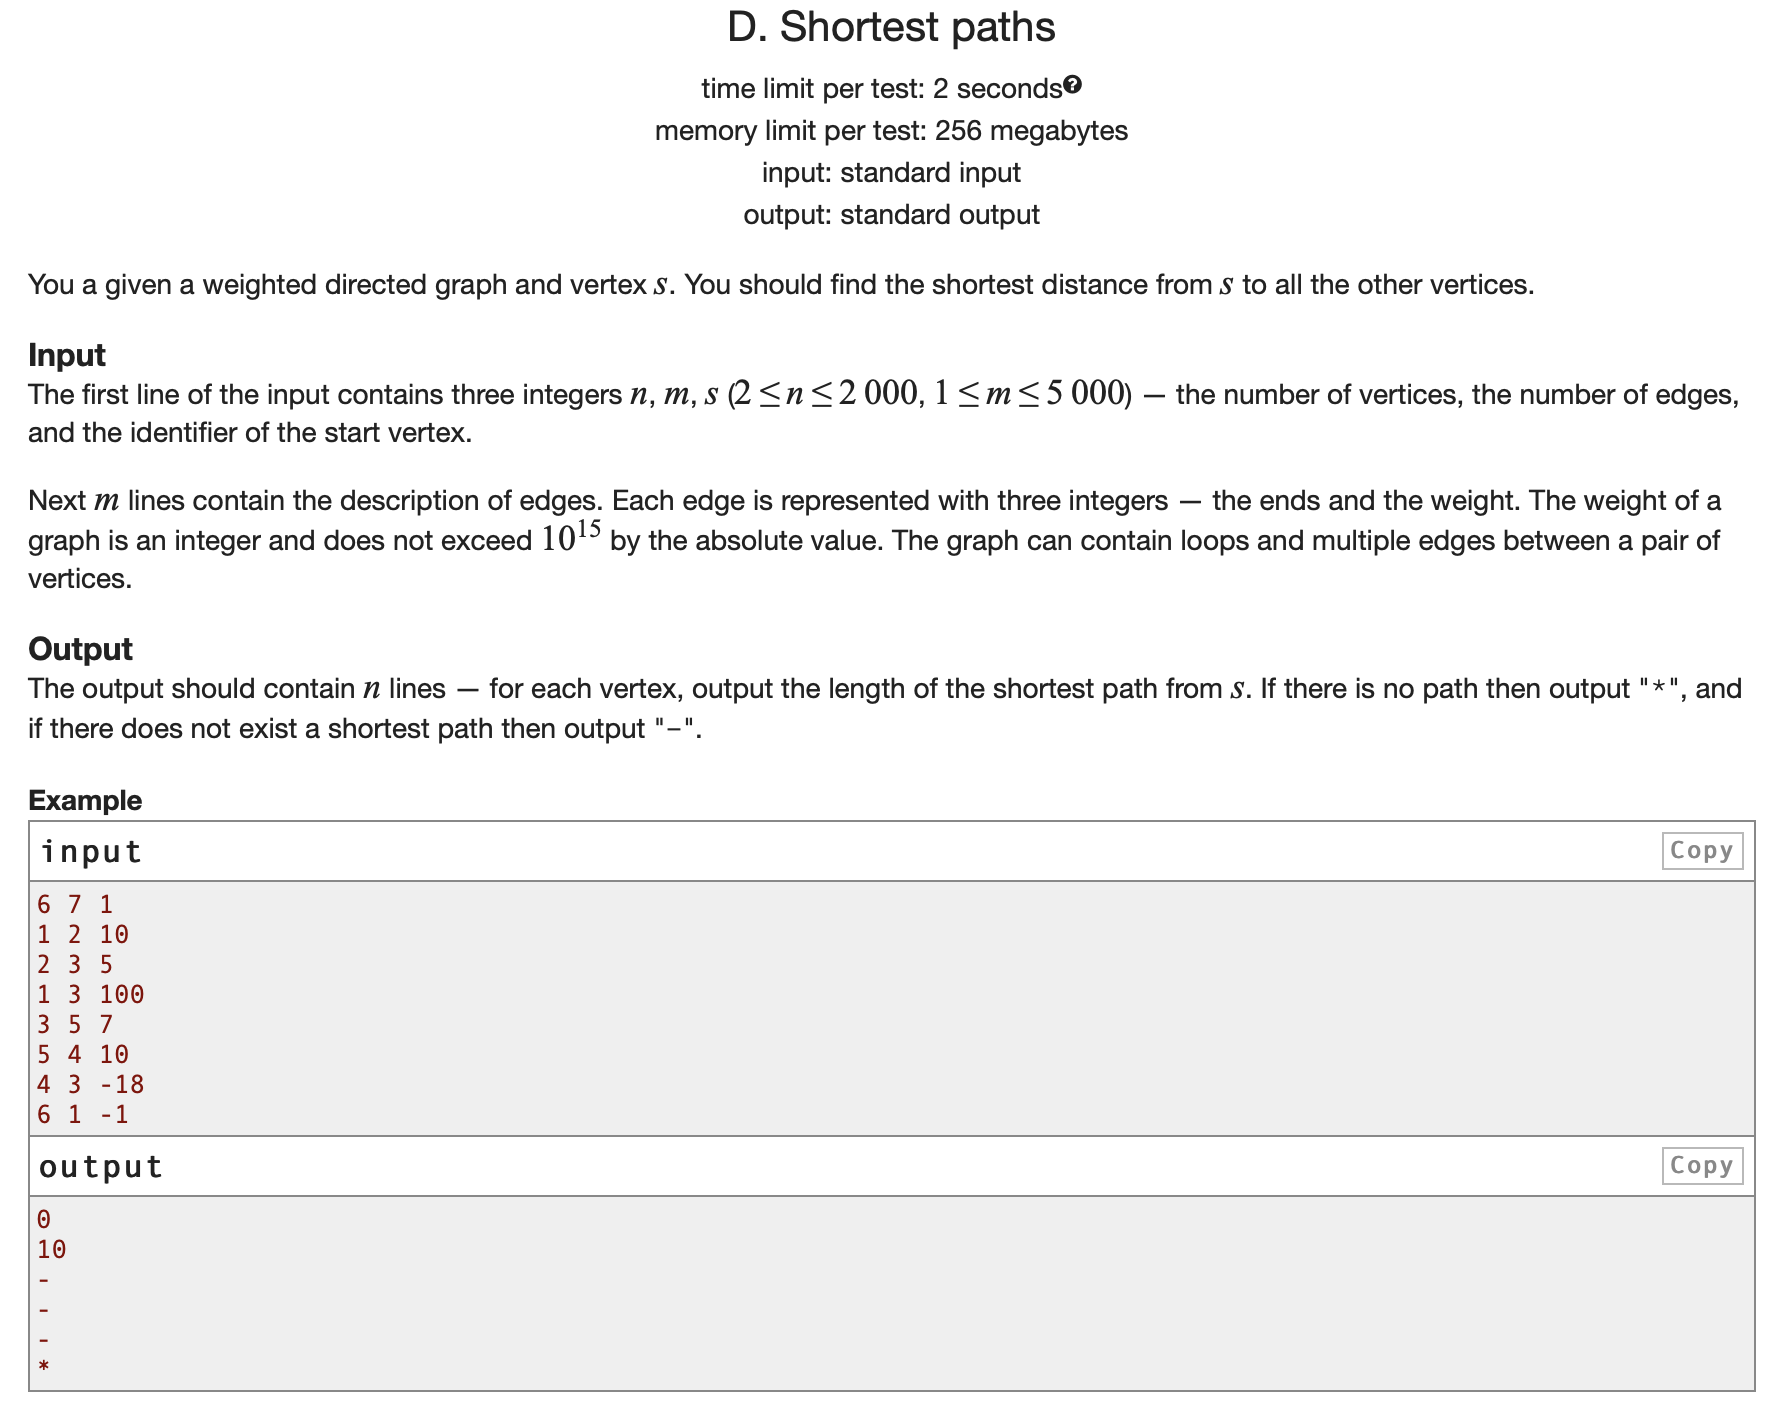

In [186]:
from sys import setrecursionlimit
import threading


def init_adjacency_list(V_num, E_num):
    adjacency_list = [[] for _ in range(V_num)]
    for _ in range(E_num):
        V_out, V_in, weight = list(map(int, input().split()))
        adjacency_list[V_out - 1].append((V_in - 1, weight))
    return adjacency_list


def get_distances(adjacency_list, start_vertex):
    distances = [float("inf")] * len(adjacency_list)
    distances[start_vertex] = 0
    for _ in range(len(adjacency_list)):
        for V_out in range(len(adjacency_list)):
            for V_in, weight in adjacency_list[V_out]:
                distances[V_in] = min(distances[V_in], distances[V_out] + weight)
    return distances


def dfs(vertex, adjacency_list, used):
    used[vertex] = True
    for adjacent_vertex, _ in adjacency_list[vertex]:
        if not used[adjacent_vertex]:
            dfs(adjacent_vertex, adjacency_list, used)


def main():
    V_num, E_num, start_vertex = list(map(int, input().split()))
    start_vertex -= 1
    adjacency_list = init_adjacency_list(V_num, E_num)
    distances = get_distances(adjacency_list, start_vertex)
 
    used = [False] * V_num
    for V_out in range(V_num):
        for V_in, weight in adjacency_list[V_out]:
            if distances[V_in] > distances[V_out] + weight and not used[V_in]:
                dfs(V_in, adjacency_list, used)
 
    for vertex in range(V_num):
        if distances[vertex] == float("inf"):
            print('*')
        elif used[vertex]:
            print('-')
        else:
            print(distances[vertex])


setrecursionlimit(10 ** 9)
threading.stack_size(2 ** 26)
thread = threading.Thread(target=main)
thread.start()

-
-
-
-
-
